**Stock Price Prediction & Forcasting using Stacked LSTM**

Using Keras and Tensorflow

In [129]:
#Data Collection
import pandas_datareader as pdr

In [130]:
df = pdr.get_data_tiingo('GOOG', api_key='a4df6068cedc8cc019d45fad6059f5ca7448d94f')

In [132]:
df.to_csv('GOOG.csv')

In [133]:
import pandas as pd

In [134]:
df = pd.read_csv('GOOG.csv')

In [135]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-11-16 00:00:00+00:00,764.48,766.36,750.51,755.20,1472594,764.48,766.36,750.51,755.20,1472594,0.0,1.0
1,GOOG,2016-11-17 00:00:00+00:00,771.23,772.70,764.23,766.92,1304048,771.23,772.70,764.23,766.92,1304048,0.0,1.0
2,GOOG,2016-11-18 00:00:00+00:00,760.54,775.00,760.00,771.37,1547145,760.54,775.00,760.00,771.37,1547145,0.0,1.0
3,GOOG,2016-11-21 00:00:00+00:00,769.20,769.70,760.60,762.61,1330639,769.20,769.70,760.60,762.61,1330639,0.0,1.0
4,GOOG,2016-11-22 00:00:00+00:00,768.27,776.96,767.00,772.63,1593108,768.27,776.96,767.00,772.63,1593108,0.0,1.0


In [136]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2021-11-08 00:00:00+00:00,2987.03,3020.6899,2982.40,3000.000,919407,2987.03,3020.6899,2982.40,3000.000,919407,0.0,1.0
1253,GOOG,2021-11-09 00:00:00+00:00,2984.97,3007.5700,2950.14,2994.920,842214,2984.97,3007.5700,2950.14,2994.920,842214,0.0,1.0
1254,GOOG,2021-11-10 00:00:00+00:00,2932.52,2973.9999,2906.50,2960.195,1135416,2932.52,2973.9999,2906.50,2960.195,1135416,0.0,1.0
1255,GOOG,2021-11-11 00:00:00+00:00,2934.96,2970.0450,2933.89,2942.140,623155,2934.96,2970.0450,2933.89,2942.140,623155,0.0,1.0
1256,GOOG,2021-11-12 00:00:00+00:00,2992.91,2997.1900,2929.08,2956.630,849970,2992.91,2997.1900,2929.08,2956.630,849970,0.0,1.0


In [137]:
df1 = df.reset_index()['close']

In [138]:
df1.shape

(1257,)

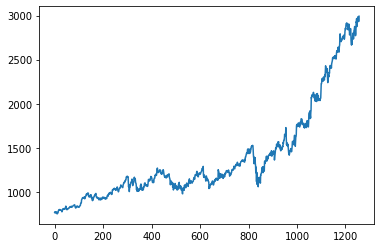

In [139]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [140]:
df1

0        764.48
1        771.23
2        760.54
3        769.20
4        768.27
         ...   
1252    2987.03
1253    2984.97
1254    2932.52
1255    2934.96
1256    2992.91
Name: close, Length: 1257, dtype: float64

LTSM are sensitive to the scale of data, so we have to use MinMax Scaler.

In [141]:
import numpy as np

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [143]:
df1

array([[0.00737642],
       [0.01038312],
       [0.00562141],
       ...,
       [0.9731001 ],
       [0.97418697],
       [1.        ]])

In [144]:
df1.shape

(1257, 1)

Splitting dataset into train and test split

In [145]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size:], df1[training_size:len(df1),:1]

In [146]:
training_size, test_size

(817, 440)

Convert an array of values into a dataset matrix

In [147]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

Reshape into X = t, t+1, t+2 and t+3 and Y = t+f

In [148]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [149]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

Reshape input to be samples, time steps, features, which is requird for LTSM

In [150]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

Create the Stacked LSTM Model

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [152]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [153]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 12s 338ms/step - loss: 0.0054 - val_loss: 0.1079
Epoch 2/100
12/12 [==============================] - 3s 209ms/step - loss: 0.0014 - val_loss: 0.0463
Epoch 3/100
12/12 [==============================] - 3s 217ms/step - loss: 8.2323e-04 - val_loss: 0.0187
Epoch 4/100
12/12 [==============================] - 3s 214ms/step - loss: 5.6287e-04 - val_loss: 0.0073
Epoch 5/100
12/12 [==============================] - 3s 216ms/step - loss: 3.4965e-04 - val_loss: 0.0014
Epoch 6/100
12/12 [==============================] - 3s 214ms/step - loss: 3.4958e-04 - val_loss: 0.0013
Epoch 7/100
12/12 [==============================] - 3s 225ms/step - loss: 3.5708e-04 - val_loss: 0.0014
Epoch 8/100
12/12 [==============================] - 3s 221ms/step - loss: 3.2123e-04 - val_loss: 0.0015
Epoch 9/100
12/12 [==============================] - 3s 227ms/step - loss: 3.1382e-04 - val_loss: 0.0014
Epoch 10/100
12/12 [==============================] - 3s 221ms

In [155]:
import tensorflow as tf

In [156]:
tf.__version__

'2.7.0'

Let's do the prediction and check performance metrics

In [157]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Transform back to original form.

In [158]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculate RMSE performance metrics.

In [159]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1112.8433178954735

Test data RMSE

In [160]:
math.sqrt(mean_squared_error(y_test, test_predict))

2302.4688154130854

Plotting- shift train predictions for plotting.

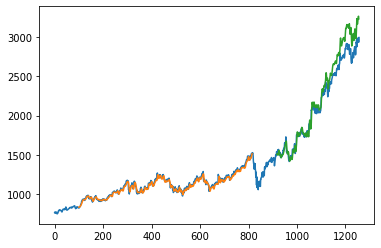

In [161]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1: len(df1) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [162]:
len(test_data)

440

In [163]:
x_input = test_data[340: ].reshape(1,-1)
x_input.shape

(1, 100)

In [164]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [165]:
temp_input

[0.8007697138962757,
 0.7982129096343415,
 0.7966494282825314,
 0.7895135390358086,
 0.7832551592657431,
 0.7926315930137775,
 0.8135715526572502,
 0.8229435320424592,
 0.8256740564545946,
 0.8176517490055635,
 0.8211929674519709,
 0.8300081514839712,
 0.8338433578768725,
 0.8435360513855297,
 0.8362665312540369,
 0.8414246834061623,
 0.8183377208807168,
 0.834796591521566,
 0.8481507712729235,
 0.8546363235470984,
 0.8946142299074831,
 0.9109038347609566,
 0.8855317841059427,
 0.8818346629606368,
 0.8832511503391998,
 0.8714960868422579,
 0.8783424425053119,
 0.880930427307026,
 0.8786898828057141,
 0.88681018623691,
 0.8876654238994384,
 0.8962712528786321,
 0.8971131274526836,
 0.8934872761125885,
 0.8997233840685259,
 0.8998703780417732,
 0.9044138281239562,
 0.8900217818342178,
 0.8835139577459143,
 0.8865741050071494,
 0.9001465485369646,
 0.9238660305836552,
 0.9354384652047447,
 0.9403516274014585,
 0.932984111287801,
 0.954610042806427,
 0.9627971616800075,
 0.9627303462376224

Demonstrate prediction for next 10 days.

In [166]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while (i<30):

    if (len(temp_input)>100):
      #print(temp_input)
      x_input = np.array(temp_input[1: ])
      print("{} day input {}".format(i, x_input))
      x_input = x_input.reshape(1,-1)
      x_input = x_input.reshape((1, n_steps, 1))
      #print(x_input)
      yhat = model.predict(x_input, verbose = 0)
      print("{} day output {}".format(i, yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input = temp_input[1: ]
      #print(temp_input)
      lst_output.extend(yhat.tolist())
      i = i + 1
    else:
      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose = 0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i = i + 1


print(lst_output)

[1.1027443]
101
1 day input [0.79821291 0.79664943 0.78951354 0.78325516 0.79263159 0.81357155
 0.82294353 0.82567406 0.81765175 0.82119297 0.83000815 0.83384336
 0.84353605 0.83626653 0.84142468 0.81833772 0.83479659 0.84815077
 0.85463632 0.89461423 0.91090383 0.88553178 0.88183466 0.88325115
 0.87149609 0.87834244 0.88093043 0.87868988 0.88681019 0.88766542
 0.89627125 0.89711313 0.89348728 0.89972338 0.89987038 0.90441383
 0.89002178 0.88351396 0.88657411 0.90014655 0.92386603 0.93543847
 0.94035163 0.93298411 0.95461004 0.96279716 0.96273035 0.96611566
 0.9516568  0.95661005 0.96323814 0.95757665 0.95784391 0.93118455
 0.94493962 0.94441401 0.96044971 0.9530332  0.92710881 0.90531361
 0.91092165 0.92243173 0.93034267 0.93752756 0.92744288 0.88007519
 0.86525998 0.85407507 0.88255627 0.85852498 0.88001283 0.8904984
 0.90681473 0.91456978 0.90380358 0.88478791 0.89536256 0.92665001
 0.928993   0.94044517 0.94812004 0.93558546 0.9388416  0.90182139
 0.90313988 0.91114882 0.97133172 0

In [167]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [168]:
import matplotlib.pyplot as plt

In [169]:
len(df1)

1257

In [170]:
df3 = df1.tolist()
df3.extend(lst_output)

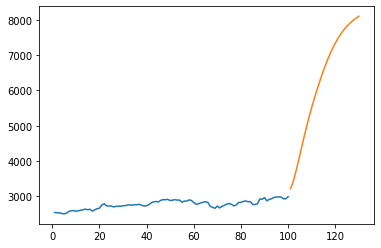

In [171]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

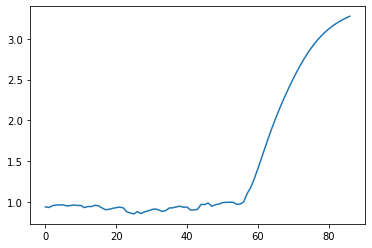

In [172]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])